ANN (Iris dataset)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
iris_data = pd.read_csv("drive/MyDrive/Colab Notebooks/ANN.csv")
iris_data.head()


,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
label_encoder = preprocessing.LabelEncoder() 
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species']) # String to numeric values 
iris_data.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
X_data = iris_data.iloc[:,1:-1].values
Y_data= iris_data.iloc[:,4].values


In [ ]:
scaler = StandardScaler().fit(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.20, random_state=0, shuffle=True)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(120, 4) (120, 3) (30, 4) (30, 3)


In [ ]:
classes=3

# Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the 1 hidden layer
model.add(keras.layers.Dense(128,input_shape=(4,), name='Hidden-Layer-1', activation='relu'))    

#Add a 2 hidden layer
model.add(keras.layers.Dense(128,name='Hidden-Layer-2', activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(classes,name='Output-Layer', activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training hyper parameters
BATCH_SIZE=4
EPOCHS = 100
VALIDATION_SPLIT=0.1

print("\nTraining Progress:\n------------------------------------")

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/100
27/27 [==============================] - 8s 39ms/step - loss: 0.9157 - accuracy: 0.6019 - val_loss: 0.5316 - val_accuracy: 0.9167
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 0.5666 - accuracy: 0.7500 - val_loss: 0.3550 - val_accuracy: 0.9167
Epoch 3/100
27/27 [==============================] - 0s 13ms/step - loss: 0.4864 - accuracy: 0.7500 - val_loss: 0.2941 - val_accuracy: 0.9167
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 0.4414 - accuracy: 0.7963 - val_loss: 0.2869 - val_accuracy: 0.9167
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 0.3860 - accuracy: 0.8519 - val_loss: 0.2490 - val_accuracy: 0.9167
Epoch 6/100
27/27 [==============================] - 0s 11ms/step - loss: 0.3921 - accuracy: 0.8056 - val_loss: 0.2287 - val_accuracy: 0.9167
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 0.3479 - accuracy

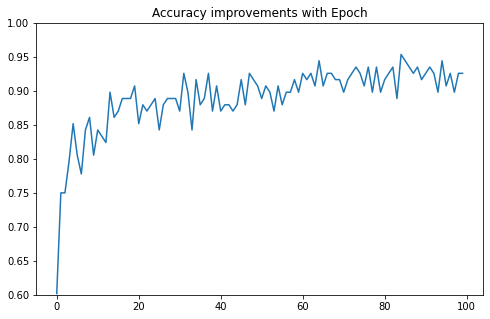

In [ ]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.ylim([0.5,1])
plt.show()


In [ ]:
score = model.evaluate(X_test,Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 166ms/step - loss: 0.0416 - accuracy: 1.0000
Test loss: 0.041634153574705124
Test accuracy: 1.0


In [ ]:
#Saving a model
model.save("drive/MyDrive/Colab Notebooks/iris_save.h5")


In [ ]:
#Loading a Model 
loaded_model = keras.models.load_model("drive/MyDrive/Colab Notebooks/iris_save.h5")

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Raw prediction data
prediction_input = [[5.5, 3. , 4.4, 1.4]]

scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
predict_y = model.predict(scaled_input)
print("Output probabilities:", predict_y)

#Find prediction
prediction = np.argmax(predict_y)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Output probabilities : [[2.8037716e-04 9.7251815e-01 2.7201550e-02]]
Prediction is  ['Iris-versicolor']
